# Simulation and Visualization of Multivariate Gaussian Distribution

In this notebook, we will simulate and visualize the marginal and conditional distributions of a Multivariate Gaussian (MVG) random vector. We will generate random samples from a bivariate normal distribution and explore both the marginal distribution of $x_1$ and the conditional distribution of $x_1$ given $x_2$.

We follow the theoretical results for marginalization and conditioning of a Multivariate Gaussian as shown below:

$$
\mathbf{x} = 
\begin{bmatrix}
\mathbf{x_1} \\
\mathbf{x_2}
\end{bmatrix}
\sim \mathcal{N}
\left(
\begin{bmatrix}
\mu_1 \\
\mu_2
\end{bmatrix},
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22}
\end{bmatrix}
\right)
$$

- The marginal distribution of $\mathbf{x_1}$ is:
$$
\mathbf{x_1} \sim \mathcal{N}(\mu_1, \Sigma_{11})
$$

- The conditional distribution of $\mathbf{x_1}$ given $\mathbf{x_2}$ is:
$$
\mathbf{x_1} | \mathbf{x_2} \sim \mathcal{N}(\mu_{1|2}, \Sigma_{11|2})
$$
where
$$
\mu_{1|2} = \mu_1 + \Sigma_{12}\Sigma_{22}^{-1} (\mathbf{x_2} - \mu_2)
$$
and
$$
\Sigma_{11|2} = \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^T
$$

## Python Simulation and Visualization

The following Python code demonstrates how to generate samples from the bivariate Gaussian distribution, visualize the marginal distribution of $x_1$, and simulate the conditional distribution of $x_1$ given $x_2$.

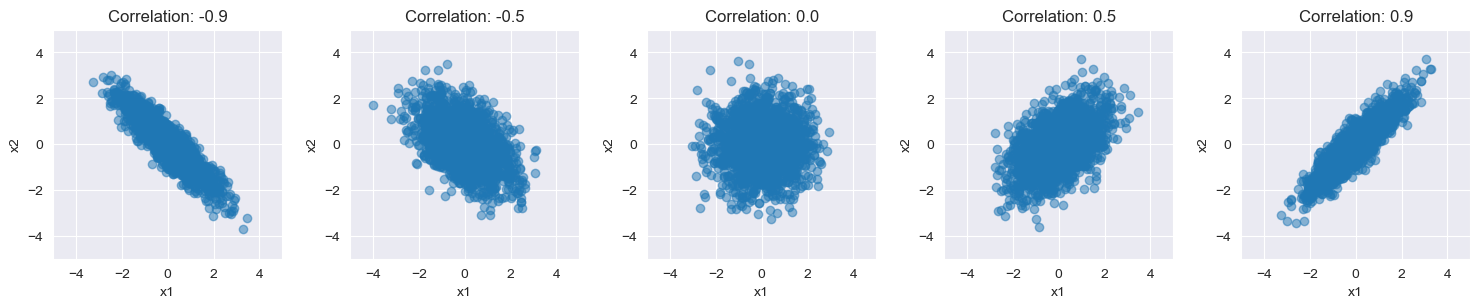

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate bivariate samples and plot for different correlation coefficients
def plot_bivariate_gaussian(var_x1, var_x2, rho_values, n_samples=2000):
    """
    Plot joint distributions of x1 and x2 for different correlation coefficients (rho).
    
    Args:
    - var_x1: Variance of x1
    - var_x2: Variance of x2
    - rho_values: List of correlation coefficients (rho) to iterate over
    - n_samples: Number of samples to generate
    """
    
    mu_1 = 0  # Mean of x1
    mu_2 = 0  # Mean of x2

    # Prepare a plot with multiple subplots to visualize different rho values
    n_rhos = len(rho_values)
    fig, axes = plt.subplots(1, n_rhos, figsize=(15, 5))
    
    for i, rho in enumerate(rho_values):
        # Covariance matrix based on input rho, var_x1, and var_x2
        cov_x1_x2 = rho * np.sqrt(var_x1 * var_x2)  # Cov(x1, x2) = rho * sqrt(Var(x1) * Var(x2))
        Sigma = np.array([[var_x1, cov_x1_x2], [cov_x1_x2, var_x2]])
        
        # Generate samples from the bivariate normal distribution
        mean = np.array([mu_1, mu_2])
        samples = np.random.multivariate_normal(mean, Sigma, n_samples)
        x1_samples = samples[:, 0]
        x2_samples = samples[:, 1]
        
        # Plot the joint distribution for the current value of rho
        axes[i].scatter(x1_samples, x2_samples, alpha=0.5)
        axes[i].set_title(f'Correlation: {rho}')
        axes[i].set_xlabel('x1')
        axes[i].set_ylabel('x2')
        
        # Limit the axes to show the data clearly
        axes[i].set_xlim(-5, 5)
        axes[i].set_ylim(-5, 5)
        
        axes[i].set_aspect('equal')

    plt.tight_layout()
    plt.show()

# Define variances for x1 and x2
var_x1 = 1.0  # Variance of x1
var_x2 = 1.0  # Variance of x2

# Define the correlation coefficients to iterate over
rho_values = [-0.9, -0.5, 0.0, 0.5, 0.9]

# Call the function to plot the joint distributions for different rho values
plot_bivariate_gaussian(var_x1, var_x2, rho_values)


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Define the mean and covariance matrix for the bivariate Gaussian (x1 and x2 are scalar)
mu_1 = 0  # Mean of x1
mu_2 = 0  # Mean of x2
Sigma_11 = 1.0  # Variance of x1
Sigma_22 = 1.0  # Variance of x2
Sigma_12 = 0.8  # Covariance between x1 and x2

# Covariance matrix for the bivariate Gaussian
Sigma = np.array([[Sigma_11, Sigma_12], [Sigma_12, Sigma_22]])

# Generate samples from the bivariate normal distribution
n_samples = 5000000
mean = np.array([mu_1, mu_2])
samples = np.random.multivariate_normal(mean, Sigma, n_samples)

x1_samples = samples[:, 0]
x2_samples = samples[:, 1]

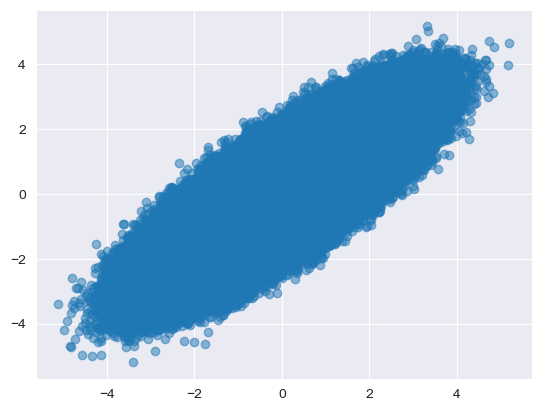

In [43]:
plt.scatter(x1_samples, x2_samples, alpha=0.5)

In [46]:
def plot_marginal_distribution(x_samples, c_samples, value, epsilon=0.05):
    lower_bound = value - epsilon
    upper_bound = value + epsilon
    
    # Filter the data: get x1 and x2 samples that fall within the range [0.45, 0.55]
    mask = (c_samples >= lower_bound) & (c_samples <= upper_bound)
    filtered_samples = x_samples[mask]
    
    # Plot the histogram of the filtered x1 and x2 samples
    plt.figure(figsize=(5, 2))
    
    # Histogram of filtered x2 samples
    plt.subplot(1, 2, 2)
    plt.hist(filtered_samples, bins=30, density=True, alpha=0.6, color='g')
    plt.title(f'Filtered Distribution in Range [{lower_bound}, {upper_bound}]')
    plt.xlabel('filtered_samples')
    plt.ylabel('Density')
    
    # Plot vertical lines at the specified value
    plt.axvline(x=value, color='r', linestyle='--', label='True Value', linewidth=2)
    
    plt.tight_layout()
    plt.show()


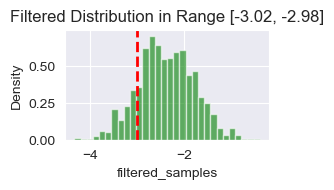

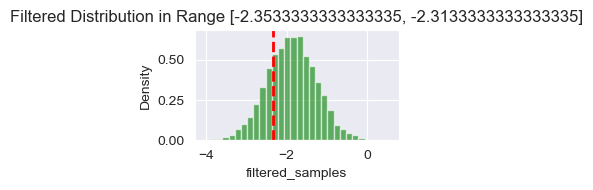

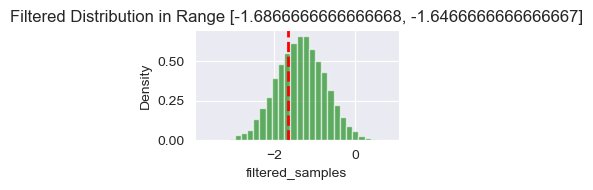

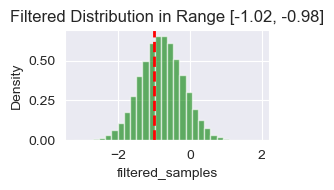

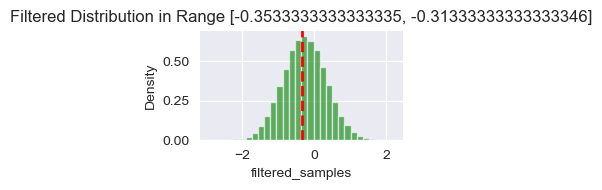

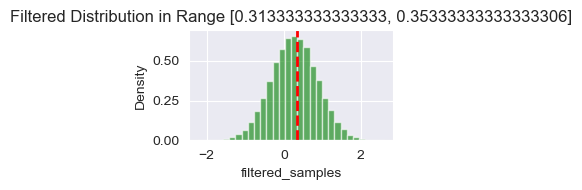

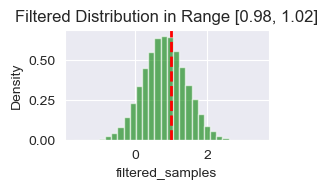

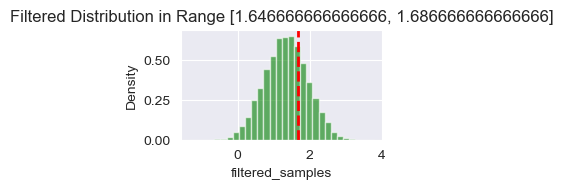

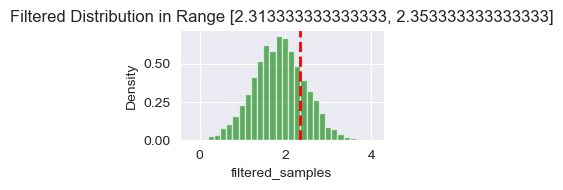

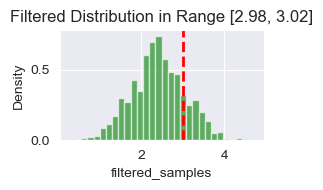

In [47]:
mus = np.linspace(-3, 3, 10)
for mu in mus:
    plot_marginal_distribution(x1_samples, x2_samples, mu, epsilon=0.02)